**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Classroom code**: [wv4cglx]

# 14: ANÁLISIS DISCRIMINANTE LINEAL
Análisis discriminante lineal es una técnica estadística para clasificación binaria o multiclases, que asume una distribución gausiana de las variables de entrada.

Importar las librerias que comunmente utilizamos.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter("ignore")

En este caso utilizaremos la base de datos de Iris, la cual corresponde a un problema de clasificación multiclases.

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

Para la partición de los datos utilizaremos en este caso solo una partición.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

La implementación de LDA se realiza de la siguiente manera. En este caso se quiere obtener 2 funciones discriminantes (n_components).

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=2)
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)

(105, 2)


Estas dos funciones discriminantes con los datos quedan de la siguiente manera:

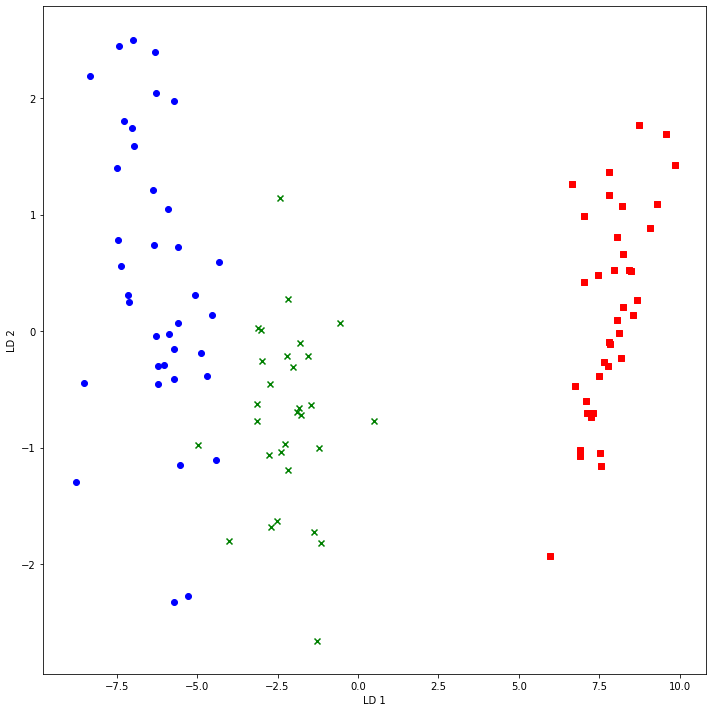

In [46]:
markers = ['s','x','o']
colors = ['r','g','b']
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.tight_layout();

Para predecir utilizando los datos de validación se procede de la siguiente forma:

In [23]:
y_pred = LDA.predict(X_test)
#calcular la probabilidad para cada clase
y_prob=LDA.predict_proba(X_test)
prob_si=LDA.predict_proba(X_test)[:,1]

Para evaluar el desempeño y capacidad de predicción utilizamos:

In [51]:
#Exactitud del modelo
print('Accuracy de LDA para validación: {:.2f}'.format(LDA.score(X_test, y_test)))

#Matriz de confusion
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

#Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy de LDA para validación: 0.96
[[ 8  2  2]
 [ 3 10  7]
 [ 5  5  3]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        12
           1       0.59      0.50      0.54        20
           2       0.25      0.23      0.24        13

    accuracy                           0.47        45
   macro avg       0.45      0.47      0.45        45
weighted avg       0.47      0.47      0.46        45



Para comparar los resultados con análisis de Componentes Principales (PCA)

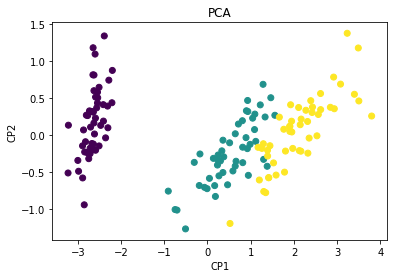

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X) # obtener los componentes principales
X_pca=pca.transform(X) # convertimos nuestros datos con las nuevas dimensiones de PCA

plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.title("PCA")
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.show()

La implemetacion del modelo con KFold se realiza de la siguiente manera:

In [33]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
kfold = ShuffleSplit(n_splits=5)
results = cross_val_score(LDA, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.9636363636363636
0.0727272727272727


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

